# Correlation of World Happiness to Certain Attributes (Regional)

In [1]:
#Initialize Tools
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns 
import requests
import math
import geopandas as gpd


In [2]:
#Import Data
Happiness_Index = pd.read_csv("Resources/WHR_2005to2023_processed.csv")

In [25]:
happiness_corr1 = ['Life Ladder', 'Log GDP Per Capita', 'Social Support', 'Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices', 'Generosity', 'Perceptions Of Corruption', 'Positive Affect', 'Negative Affect', 'Confidence In National Government']
happiness_corrGeneral = Happiness_Index[happiness_corr1]
happiness_corrGeneral.corr()

,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
Life Ladder,1.000000,0.784850,0.728171,0.714106,0.539667,0.174507,-0.434104,0.518207,-0.339992,-0.081887
Log GDP Per Capita,0.784850,1.000000,0.686641,0.817510,0.371160,-0.008925,-0.358266,0.237986,-0.247560,-0.188351
Social Support,0.728171,0.686641,1.000000,0.601054,0.412813,0.065939,-0.224953,0.431139,-0.441800,-0.169573
Healthy Life Expectancy At Birth,0.714106,0.817510,0.601054,1.000000,0.377589,0.006522,-0.305198,0.223119,-0.140726,-0.178003
Freedom To Make Life Choices,0.539667,0.371160,0.412813,0.377589,1.000000,0.319620,-0.472306,0.578752,-0.275470,0.408533
Generosity,0.174507,-0.008925,0.065939,0.006522,0.319620,1.000000,-0.271760,0.307140,-0.080837,0.294399
Perceptions Of Corruption,-0.434104,-0.358266,-0.224953,-0.305198,-0.472306,-0.271760,1.000000,-0.280620,0.266267,-0.460789
Positive Affect,0.518207,0.237986,0.431139,0.223119,0.578752,0.307140,-0.280620,1.000000,-0.330236,0.123241
Negative Affect,-0.339992,-0.247560,-0.441800,-0.140726,-0.275470,-0.080837,0.266267,-0.330236,1.000000,-0.125631
Confidence In National Government,-0.081887,-0.188351,-0.169573,-0.178003,0.408533,0.294399,-0.460789,0.123241,-0.125631,1.000000


C:\Users\c_mar\anaconda3\envs\dev\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


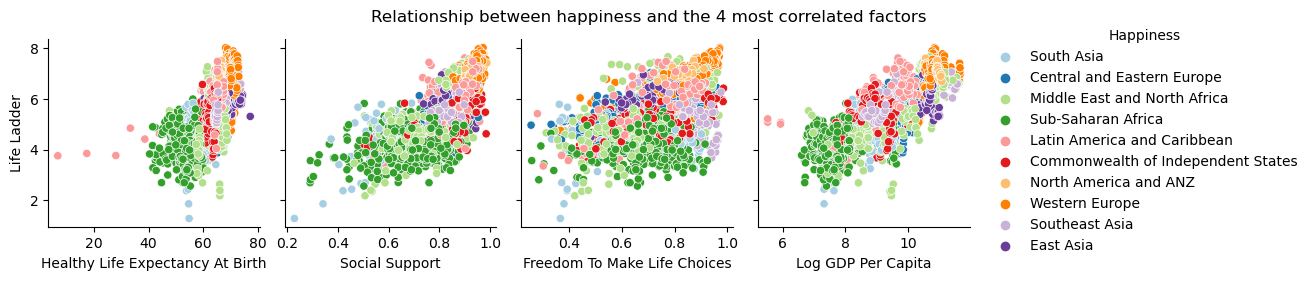

In [26]:
#It appears that GDP, Life Expectancy, Social Support, and Freedom to make choices are the four most influencial factors to happiness.
#Conducting more analysis
g=sns.pairplot(Happiness_Index, y_vars="Life Ladder", x_vars=['Healthy Life Expectancy At Birth', 'Social Support','Freedom To Make Life Choices', 'Log GDP Per Capita'], hue="Regional Indicator",
            palette="Paired", diag_kind = None)
g.fig.suptitle("Relationship between happiness and the 4 most correlated factors", y=1.08)
g._legend.set_title("Happiness")

C:\Users\c_mar\anaconda3\envs\dev\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


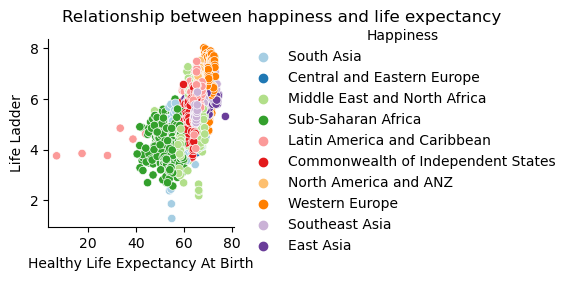

In [27]:
#Life Expectancy
g=sns.pairplot(Happiness_Index, y_vars="Life Ladder", x_vars=['Healthy Life Expectancy At Birth'], hue="Regional Indicator",
            palette="Paired", diag_kind = None)
g.fig.suptitle("Relationship between happiness and life expectancy", y=1.08)
g._legend.set_title("Happiness")

C:\Users\c_mar\anaconda3\envs\dev\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


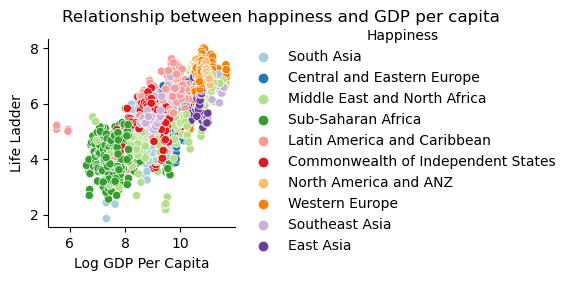

In [28]:
#GDP per Capita
g=sns.pairplot(Happiness_Index, y_vars="Life Ladder", x_vars=['Log GDP Per Capita'], hue="Regional Indicator",
            palette="Paired", diag_kind = None)
g.fig.suptitle("Relationship between happiness and GDP per capita", y=1.08)
g._legend.set_title("Happiness")

C:\Users\c_mar\anaconda3\envs\dev\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


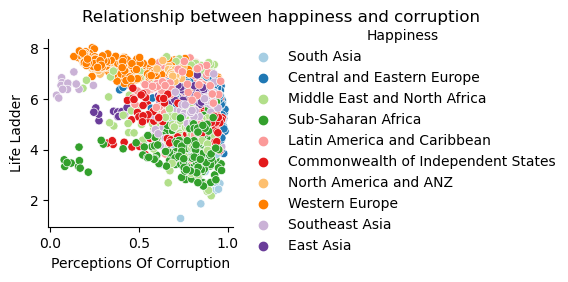

In [29]:
#Corruption
g=sns.pairplot(Happiness_Index, y_vars="Life Ladder", x_vars=['Perceptions Of Corruption'], hue="Regional Indicator",
            palette="Paired", diag_kind = None)
g.fig.suptitle("Relationship between happiness and corruption", y=1.08)
g._legend.set_title("Happiness")

C:\Users\c_mar\anaconda3\envs\dev\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


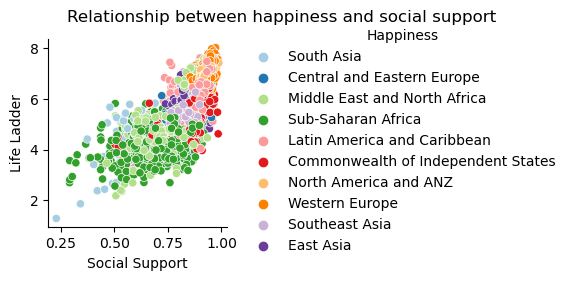

In [30]:
#Social Support
g=sns.pairplot(Happiness_Index, y_vars="Life Ladder", x_vars=['Social Support'], hue="Regional Indicator",
            palette="Paired", diag_kind = None)
g.fig.suptitle("Relationship between happiness and social support", y=1.08)
g._legend.set_title("Happiness")

C:\Users\c_mar\anaconda3\envs\dev\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


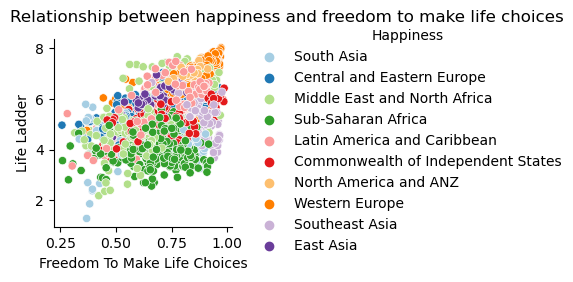

In [31]:
#Freedom to Make Life Choices
g=sns.pairplot(Happiness_Index, y_vars="Life Ladder", x_vars=['Freedom To Make Life Choices'], hue="Regional Indicator",
            palette="Paired", diag_kind = None)
g.fig.suptitle("Relationship between happiness and freedom to make life choices", y=1.08)
g._legend.set_title("Happiness")